In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [3]:
df = pd.read_excel("dataset.xlsx")

In [4]:
df.columns = df.columns.str.strip()

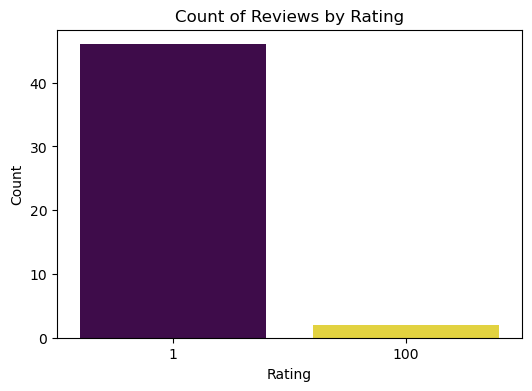

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=df, hue="rating", palette="viridis", legend=False)
plt.title("Count of Reviews by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

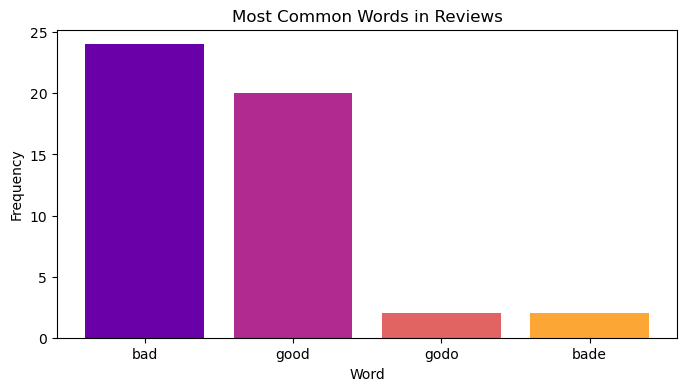

In [9]:
words = " ".join(str(r) for r in df["review"]).lower().split()
word_counts = Counter(words)
common_words = dict(word_counts.most_common(10))

plt.figure(figsize=(8,4))
colors = sns.color_palette("plasma", len(common_words))   # generate colors

bars = plt.bar(list(common_words.keys()), list(common_words.values()), color=colors)
plt.title("Most Common Words in Reviews")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


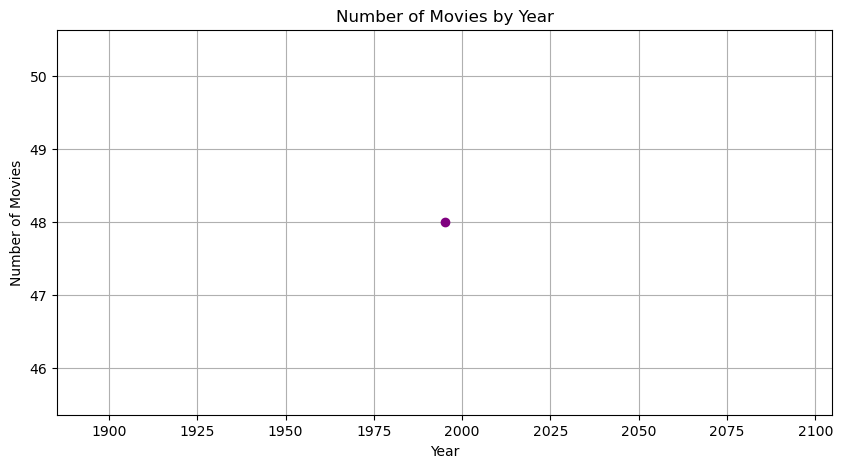

In [10]:
df["Year"] = df["Movie"].apply(lambda x: re.findall(r"\((\d{4})\)", str(x))[0] if re.findall(r"\((\d{4})\)", str(x)) else None)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

yearly_counts = df["Year"].value_counts().sort_index()
plt.figure(figsize=(10,5))
yearly_counts.plot(kind="line", marker="o", color="purple")
plt.title("Number of Movies by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

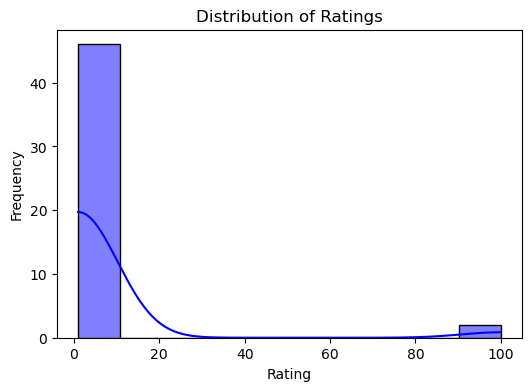

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df["rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

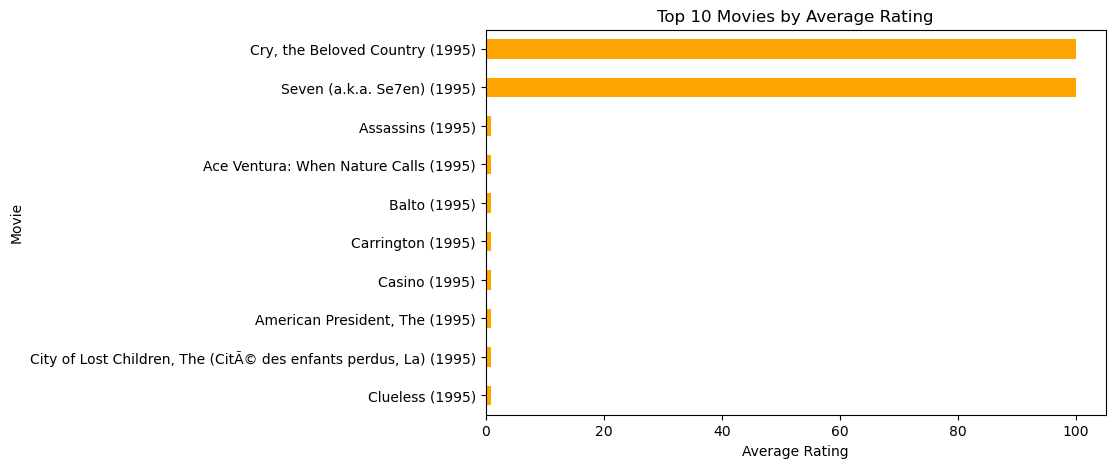

In [12]:
top_movies = df.groupby("Movie")["rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_movies.plot(kind="barh", color="orange")
plt.title("Top 10 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie")
plt.gca().invert_yaxis()
plt.show()